# Exploring Health Records

This notebook explores a dataset generated by a previous project. For context, visit https://github.com/amcgaha/coding-health-records/blob/main/README.md.

1. Import and process dataset
2. Develop plotting functions
3. Explore Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Load and Process Data
First, load data and specify which columns to use.

In [2]:
columns = ['patient_id', 'report_year', 'is_camper', 'home_notified', 'abdominal_pain',
       'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'sum_true',
        'summer_day_id', 'session_id', 'weekday', 'day_type', 'session_day']

full_df = pd.read_csv('C:\\Users\\avery\\OneDrive\\wave_visuals\\health_dataset_full.csv', usecols=columns)

print(full_df.columns)

Index(['patient_id', 'is_camper', 'home_notified', 'abdominal_pain',
       'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'sum_true',
       'report_year', 'summer_day_id', 'session_id', 'weekday', 'day_type',
       'session_day'],
      dtype='object')


In this and future analyses, we want to easily look at not only single symptoms (for example, fevers or cuts) but also collections of symptoms, like injuries or cold/flu symptoms. 

The first thing we should do in the data processing phase is to create these "buckets" of symptoms by creating a dictionary.

In [3]:
bucket_dict = {'one_cold_flu': ['congestion', 'respiratory', 'fever', 'cough', 'cold', 'fatigue'],
               'two_cold_flu': ['congestion', 'respiratory', 'headache', 'fever', 'cough', 'cold', 'fatigue'],
               'gi_issues': ['stomach_ache', 'nausea', 'bm', 'diarrhea', 'abdominal_pain'],
               'injury': ['wound', 'rolled_ankle', 'fracture', 'swelling', 'cut', 'splinter', 'burn', 'bruise', 'abrasion', 'hit'],
               'allergic': ['allergy', 'hives', 'rash', 'itch', 'anaphylaxis', 'grass'],
               'entropy': ['fatigue', 'blister'],
               'mental_health': ['anxiety', 'homesick'],
               'random': ['menstrual', 'nosebleed'],
               'bugs_any': ['bug_bite', 'tick', 'sting', 'lice']
              }

Create a function that generates buckets as new columns from exisiting collections of columns.

In [4]:
def create_bucket(dataframe, dictionary, key, sum_count):
    """Sums all Trues from a collection of columns, located from a dictionary, and creates a new column with the sum count."""
    
    # initialize new column
    dataframe[key] = False
    
    # state list of columns in bucket, from dictionary value
    column_list = dictionary[key]
    
    # sum all trues across selected columns and subset rows that have a specified number of Trues
    condition = dataframe.loc[:, column_list].sum(axis=1) >= sum_count
    
    # set bucket value (new column) to True where meets above condition
    dataframe.loc[condition, key] = True

Apply ```create_bucket``` function to each key in the ```bucket_dict```, setting the count kwarg to 2 for only the ```'two_cold_flu'``` bucket. 

In [5]:
for key in bucket_dict:
    
    if key == 'two_cold_flu':
        count = 2
        create_bucket(full_df, bucket_dict, key, count)
    
    else:
        count = 1
        create_bucket(full_df, bucket_dict, key, count)

Verify that the buckets were created correctly.

In [6]:
print(full_df['two_cold_flu'].sum())
print(full_df['one_cold_flu'].sum())

200
708


In [7]:
print(full_df.columns)

Index(['patient_id', 'is_camper', 'home_notified', 'abdominal_pain',
       'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'sum_true',
       'report_year', 'summer_day_id', 'session_id', 'weekday', 'day_type',
       'session_day', 'one_cold_flu', 'two_cold_flu', 'gi_issues', 'injury',
       'allergic', 'entropy', 'mental_health', 'random', 'bugs_any'],
      dtype='object')


Create separate dataframes for camper and staff only records.

In [8]:
camper_df = full_df[full_df['is_camper'] == True]
print(camper_df.shape)

staff_df = full_df[full_df['is_camper'] == False]
print(staff_df.shape)

(3097, 70)
(692, 70)


Store all three in a dictionary to loop over later.

In [9]:
df_dict = {'all': full_df,
           'staff': staff_df, 
           'campers': camper_df}

Define a function that groups dataframe by ```'session_day_id'```, applies ```functions``` to aggregate data, and then fill in missing days.

In [10]:
def prepare_by_day(dataframe, cols_to_group, function_dict):
    """creates a groupby object, turns it into a dataframe, then merges with another dataframe to fill missing day values"""
    
    # create groupby object using specified columns and function dictionary
    grouped = dataframe.groupby(cols_to_group).agg(function_dict)
    
    # turn groupby object into dataframe and fill na values with 0
    grouped_df = pd.DataFrame(grouped).fillna(0).reset_index()
    
    # generate day list, dictionary, then dataframe
    day_list = [day for day in range(1, 75)]
    day_dict = dict.fromkeys(grouped.columns, 0)
    day_df = pd.DataFrame(day_dict, index=day_list)
    day_df['summer_day_id'] = day_df.index
    day_df_selected = day_df[['summer_day_id']]
    
    # merge
    joined_df = grouped_df.merge(day_df_selected, on='summer_day_id', how='outer').fillna(0)
    
    # return output
    return joined_df.sort_values('summer_day_id')


Define a function that groups dataframe by ```'session_id'``` and applies ```functions``` to aggregate data. In this function, we remove all datapoints from 2016, a vastly underreported year. Some sessions, for example, falsely record zero health center visits. By removing 2016 for just this function, we will be able to better guage the real statistics of each session.

In [11]:
def prepare_by_session(dataframe, function_dict):
    """Selects records not in 2016, then groups by report year and session, applying a chosen function dictionary. 
    It then converts to a dataframe and returns it."""
    
    condition = dataframe['report_year'] != 2016
    selected_df = dataframe.loc[condition, :]
    
    grouped = selected_df.groupby(['report_year', 'session_id']).agg(function_dict)
    
    grouped_df = pd.DataFrame(grouped).fillna(0).reset_index()
    
    return grouped_df

Create the ```functions``` dictionary used in the above functions. 

In [12]:
# create dictionary of functions. In this case, we will want to find the sum of *almost* every column.    
function_string = 'sum'
functions = dict.fromkeys(full_df.columns, function_string)

# We don't want to sum 'patient_id', which is a primary key for a database and not a meaningful number. 
# Instead, we want to 'count' this field. Replace 'sum' with 'count' for 'patient_id'
functions['patient_id'] = 'count'

# create a list of items we don't want to apply functions to
no_func_list = ['summer_day_id', 'report_year', 'session_id', 'weekday', 'day_type', 'session_day']

# delete each item in the group_list from agg function
for item in no_func_list:
    del functions[item]
    
# check output
print(functions)

{'patient_id': 'count', 'is_camper': 'sum', 'home_notified': 'sum', 'abdominal_pain': 'sum', 'abrasion': 'sum', 'allergy': 'sum', 'anaphylaxis': 'sum', 'blister': 'sum', 'bm': 'sum', 'bruise': 'sum', 'bug_bite': 'sum', 'congestion': 'sum', 'cut': 'sum', 'diarrhea': 'sum', 'fatigue': 'sum', 'fever': 'sum', 'headache': 'sum', 'hives': 'sum', 'homesick': 'sum', 'itch': 'sum', 'menstrual': 'sum', 'mono': 'sum', 'nausea': 'sum', 'respiratory': 'sum', 'sore_throat': 'sum', 'splinter': 'sum', 'sting': 'sum', 'stomach_ache': 'sum', 'sun_burn': 'sum', 'tick': 'sum', 'rolled_ankle': 'sum', 'vomiting': 'sum', 'wound': 'sum', 'poison_ivy': 'sum', 'swelling': 'sum', 'rash': 'sum', 'cough': 'sum', 'asthma': 'sum', 'fracture': 'sum', 'burn': 'sum', 'cold': 'sum', 'nosebleed': 'sum', 'toe': 'sum', 'bike': 'sum', 'predator': 'sum', 'capture': 'sum', 'hike': 'sum', 'hit': 'sum', 'campout': 'sum', 'anxiety': 'sum', 'lice': 'sum', 'grass': 'sum', 'eye': 'sum', 'sleep': 'sum', 'sum_true': 'sum', 'one_cold_

Now it's time to use the functions. We'll loop over a dictionary of dataframes to make this efficient.

First, apply the ```prepare_by_day()``` function on each value in the dictionary of dataframes, storing each result as a value in a new dictionary, ```prepared_day_dict```.

In [13]:
# initialize dictionary
prepared_day_dict = {}

# apply prepare_by_day function for each item in the original dictionary of dataframes, called df_dict
for key in df_dict:
    prepared_day_dict[key] = prepare_by_day(df_dict[key], ['summer_day_id'], functions)

# check output keys
print(prepared_day_dict.keys())

dict_keys(['all', 'staff', 'campers'])


Repeat this process using the ```prepare_by_session()``` function, storing results in ```session_dict```. 

In [14]:
# initialize new dataframe
session_dict = {}

# apply prepare_by_session function for each item in the original dictionary of dataframes, called df_dict
for key in df_dict:
    session_dict[key] = prepare_by_session(df_dict[key], functions)

# check output keys
print(session_dict.keys())    

dict_keys(['all', 'staff', 'campers'])


## 2. Define Plotting Functions

Define a function to plot categories by session.

In [15]:
def session_plot(dataframe_str, category_str, agg_func):
    """Plots sum or proportion of all visits by session that match a chosen category"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    selected_df = session_dict[dataframe_str]
    
    # Create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        selected_df['temp_cat'] = selected_df[category_str]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        selected_df['temp_cat'] = (selected_df[category_str] / (selected_df['patient_id'])) * 100
       
    # Create plot and specify order
    category_order = ['staff_training', 'session_1', 'session_2', 'session_3', 'session_4', 'session_5']
    ax = sns.catplot('session_id', 'temp_cat', data=selected_df, kind='box', order=category_order, palette='Set2', aspect=2)

    # Write title text
    title_text = f'{category_str} from {dataframe_str}'

    # Configure labels
    ax.set(xlabel='Camp Session')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)
    
    # if agg_func is percent, create a flexible ylim, which adjusts if the max y value is less or equal to 50.
    if agg_func == 'percent':
        if selected_df['temp_cat'].max() <= 50:
            plt.ylim(0, 50)
        else:
            plt.ylim(0, 100)
    else:
        pass
    
    plt.show()
    
    # Show descriptive statistics
    print(round(selected_df[['session_id', 'temp_cat']].rename({'temp_cat': f'{category_str}'}, axis=1).groupby('session_id').describe(), 2))

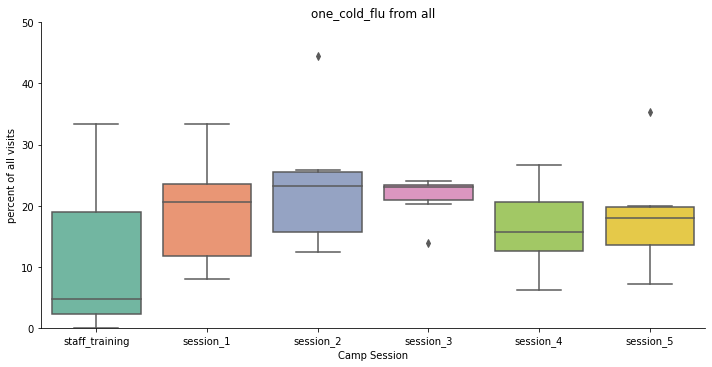

               one_cold_flu                                                 
                      count   mean    std    min    25%    50%    75%    max
session_id                                                                  
session_1               6.0  19.34   9.51   8.00  11.83  20.60  23.61  33.33
session_2               6.0  23.78  11.56  12.40  15.65  23.15  25.58  44.44
session_3               6.0  21.26   3.82  13.94  20.88  22.98  23.37  24.00
session_4               6.0  16.34   7.27   6.25  12.61  15.63  20.66  26.61
session_5               6.0  18.47   9.52   7.14  13.54  17.95  19.81  35.29
staff_training          3.0  12.66  18.05   0.00   2.33   4.65  18.99  33.33


In [16]:
session_plot('all', 'one_cold_flu', 'percent')

Define a function that builds plots by ```'summer_day_id```.

In [17]:
def day_plot(dataframe_str, category_str, agg_func):
    
    """Plots sum or proportion of all visits each day that match a chosen category"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    selected_df = prepared_day_dict[dataframe_str]
    
    # create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        selected_df['temp_cat'] = selected_df[category_str]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        selected_df['temp_cat'] = (selected_df[category_str] / (selected_df['patient_id'])) * 100
        
    # Create main scatter plot on ax object
    ax = sns.relplot('summer_day_id', 'temp_cat', data=selected_df, kind='scatter', color='lightskyblue', aspect=3)
    
    # Configure and plot rolling average
    selected_df['rolling_avg'] = selected_df['temp_cat'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg', data=selected_df)
    
    # Write title text
    title_text = f'{category_str} from {dataframe_str}'

    # Configure labels
    ax.set(xlabel='')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)

    # Draw lines at each session change
    plt.axvline(11, 0, 1, c='gray', alpha=0.5)
    plt.axvline(18, 0, 1, c='gray', alpha=0.5)
    plt.axvline(32, 0, 1, c='gray', alpha=0.5)
    plt.axvline(52, 0, 1, c='gray', alpha=0.5)
    plt.axvline(68, 0, 1, c='gray', alpha=0.5)
    plt.axvline(74, 0, 1, c='gray', alpha=0.5)
    
    # Configure xticks
    plt.xticks(ticks=[5, 14, 25, 42, 60, 71], labels=['Training', 'Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5'])
    plt.xlim(0, 74)
    
    # if agg_func is percent, create a flexible ylim, which adjusts if the max y value is less or equal to 50.
    if agg_func == 'percent':
        if selected_df['temp_cat'].max() <= 50:
            plt.ylim(0, 50)
        else:
            plt.ylim(0, 80)
    else:
        pass

    plt.show()
    
    # Show descriptive statistics
    print(round(selected_df[['temp_cat', 'gi_issues', 'injury', 'bugs_any']].rename({'temp_cat': f'{category_str}'}, axis=1).describe(), 2))    

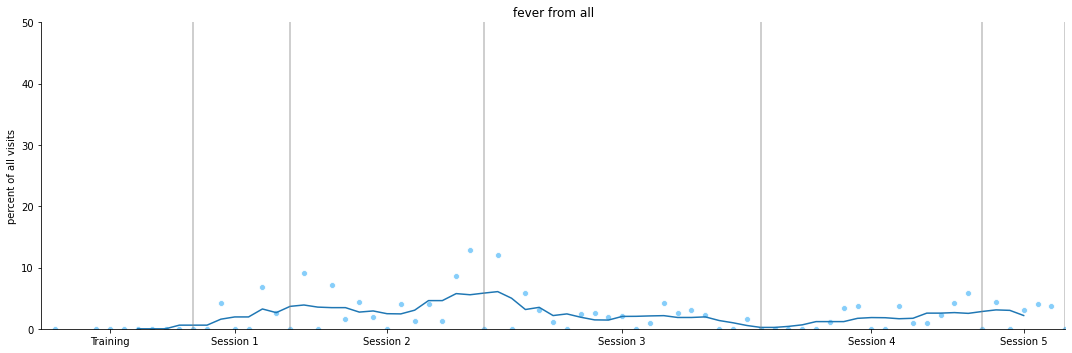

       fever  gi_issues  injury  bugs_any
count  72.00      74.00   74.00     74.00
mean    2.18       7.34   12.03     10.26
std     2.84       6.40   10.73      8.44
min     0.00       0.00    0.00      0.00
25%     0.00       2.00    2.25      3.00
50%     1.23       5.50    9.00      8.00
75%     3.70      12.00   18.75     17.00
max    12.90      27.00   35.00     28.00


In [18]:
day_plot('all', 'fever', 'percent')

Define a similar function that plots both ```'campers'``` and ```'staff'``` on the same plot.

In [19]:
def day_plot_double(category_str, agg_func):
    
    """Plots sum or proportion of all visits each day that match a chosen category, both campers and staff on same plot"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    camper_df = prepared_day_dict['campers']
    staff_df = prepared_day_dict['staff']
    
    # create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        camper_df['temp_cat'] = camper_df[category_str]
        staff_df['temp_cat'] = staff_df[category_str]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        camper_df['temp_cat'] = (camper_df[category_str] / (camper_df['patient_id'])) * 100
        staff_df['temp_cat'] = (staff_df[category_str] / (staff_df['patient_id'])) * 100
        
    # Create main scatter plot on ax object
    ax = sns.relplot('summer_day_id', 'temp_cat', data=camper_df, kind='scatter', color='lightskyblue', aspect=3)
    
    # Add secondary scatter plot
    sns.scatterplot('summer_day_id', 'temp_cat', data=staff_df, color='lightgreen')
        
    # Configure and plot rolling averages
    camper_df['rolling_avg'] = camper_df['temp_cat'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg', data=camper_df, color='blue')
    
    staff_df['rolling_avg'] = staff_df['temp_cat'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg', data=staff_df, color='green')
    
    # Write title text
    title_text = f'{category_str}'

    # Configure labels
    ax.set(xlabel='')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)

    # Draw lines at each session change
    plt.axvline(11, 0, 1, c='gray', alpha=0.5)
    plt.axvline(18, 0, 1, c='gray', alpha=0.5)
    plt.axvline(32, 0, 1, c='gray', alpha=0.5)
    plt.axvline(52, 0, 1, c='gray', alpha=0.5)
    plt.axvline(68, 0, 1, c='gray', alpha=0.5)
    plt.axvline(74, 0, 1, c='gray', alpha=0.5)
    
    # Configure xticks
    plt.xticks(ticks=[5, 14, 25, 42, 60, 71], labels=['Training', 'Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5'])
    plt.xlim(0, 74)
    
    # if agg_func is percent, create a flexible ylim, which adjusts if the max y value is less or equal to 50.
    if agg_func == 'percent':
        if camper_df['temp_cat'].max() <= 50 and staff_df['temp_cat'].max() <= 50:
            plt.ylim(0, 50)
        else:
            plt.ylim(0, 80)
    
    plt.legend(title='7-Day Avg', loc='upper left', labels=['campers', 'staff'])        
    plt.show()    
    
    # show descriptive statistics
    camper_object = round(camper_df['temp_cat'].rename({'temp_cat': f'camper {category_str}'}, axis=1).describe(), 2)
    staff_object = round(staff_df['temp_cat'].rename({'temp_cat': f'staff {category_str}'}, axis=1).describe(), 2)
    
    description_df = pd.DataFrame()
    description_df['campers'] = camper_object
    description_df['staff'] = staff_object
    description_df['diff'] = description_df['campers'] - description_df['staff']
    
    print(description_df)

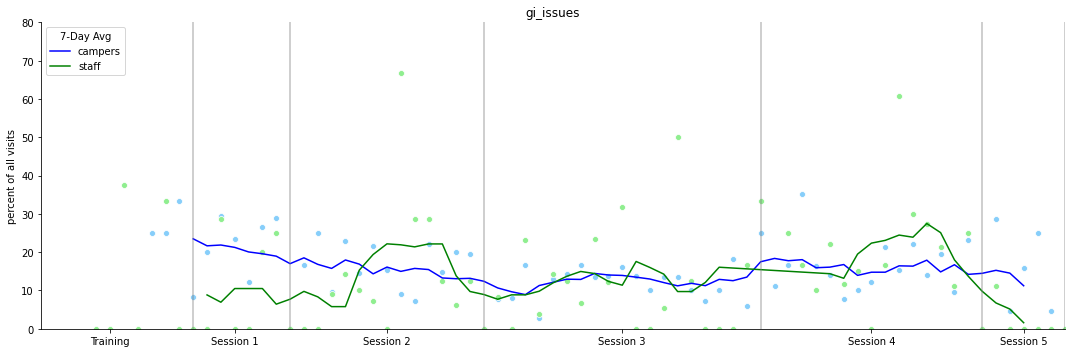

       campers   staff   diff
count    67.00   70.00  -3.00
mean     15.36   14.26   1.10
std       8.13   18.10  -9.97
min       0.00    0.00   0.00
25%       9.89    0.00   9.89
50%      14.58   10.56   4.02
75%      21.53   22.86  -1.33
max      35.29  100.00 -64.71


In [20]:
day_plot_double('gi_issues', 'percent')

In [65]:
def day_plot_multi(dataframe_str, cat_1, cat_2, cat_3, agg_func):
    
    """Plots sum or proportion of all visits each day that match THREE categories"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    selected_df = prepared_day_dict[dataframe_str]
    
    # create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        selected_df['temp_cat_1'] = selected_df[cat_1]
        selected_df['temp_cat_2'] = selected_df[cat_2]
        selected_df['temp_cat_3'] = selected_df[cat_3]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        selected_df['temp_cat_1'] = (selected_df[cat_1] / (selected_df['patient_id'])) * 100
        selected_df['temp_cat_2'] = (selected_df[cat_2] / (selected_df['patient_id'])) * 100
        selected_df['temp_cat_3'] = (selected_df[cat_3] / (selected_df['patient_id'])) * 100
        
    # Configure and plot rolling averages
    selected_df['rolling_avg_1'] = selected_df['temp_cat_1'].rolling(7).mean().shift(-3)
    ax = sns.relplot('summer_day_id', 'rolling_avg_1', data=selected_df, kind='line', color='red', aspect=3, legend='full')
    
    selected_df['rolling_avg_2'] = selected_df['temp_cat_2'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg_2', data=selected_df, color= 'lightskyblue')
    
    selected_df['rolling_avg_3'] = selected_df['temp_cat_3'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg_3', data=selected_df, color= 'gray')
    
    # Write title text
    title_text = f'{cat_1}, {cat_2}, and {cat_3} from {dataframe_str}'

    # Configure labels
    ax.set(xlabel='')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)
    
    # Draw lines at each session change
    plt.axvline(11, 0, 1, c='gray', alpha=0.5)
    plt.axvline(18, 0, 1, c='gray', alpha=0.5)
    plt.axvline(32, 0, 1, c='gray', alpha=0.5)
    plt.axvline(52, 0, 1, c='gray', alpha=0.5)
    plt.axvline(68, 0, 1, c='gray', alpha=0.5)
    plt.axvline(74, 0, 1, c='gray', alpha=0.5)
    
    # Configure xticks
    plt.xticks(ticks=[5, 14, 25, 42, 60, 71], labels=['Training', 'Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5'])
    plt.xlim(0, 74)
    
    # if agg_func is percent, create a flexible ylim, which adjusts if the max y value is less or equal to 50.
    if agg_func == 'percent':
        if selected_df['temp_cat_1'].max() <= 50 and selected_df['temp_cat_2'].max() <= 50 and selected_df['temp_cat_3'].max() <= 50:
            plt.ylim(0, 50)
        else:
            plt.ylim(0, 80)
    else:
        pass

    plt.legend(title='7-Day Avg', loc='upper left', labels=[f'{cat_1}', f'{cat_2}', f'{cat_3}'])
    plt.show()
    
    # Show descriptive statistics
    print(round(selected_df[['temp_cat_1', 'temp_cat_2', 'temp_cat_3']].rename({'temp_cat_1': f'{cat_1}', 
                                                                                'temp_cat_2': f'{cat_2}',
                                                                                'temp_cat_3': f'{cat_3}'}, axis=1).describe(), 2))
    
    # Show correlation  
    correlations =  round(selected_df[[cat_1, cat_2, cat_3]].corr(method='pearson'), 2)
    
    print('========')
    print('Correlations:')
    print(correlations)
    

Finally, define two functions to quickly generate three plots corresponding to ```'all'```, ```'campers'```, and ```'staff'```.

In [21]:
def day_plot_all(category, agg_func):
    for key in prepared_day_dict:
        day_plot(key, category, agg_func)
        
def session_plot_all(category, agg_func):
    for key in session_dict:
        session_plot(key, category, agg_func)

## 3. Explore Data

Let's first take a look at the data as a whole. The first plot will show all visits by session. The boxes show statistical reference points in each session's data, which includes the number of visits each year from 2013-2019.

To plot by session, use the ```session_plot()``` function, setting the ```agg_func``` argument to ```'sum'```  and the category to ```'patient_id'```, which will return the sum of ```'all'``` visits each session.

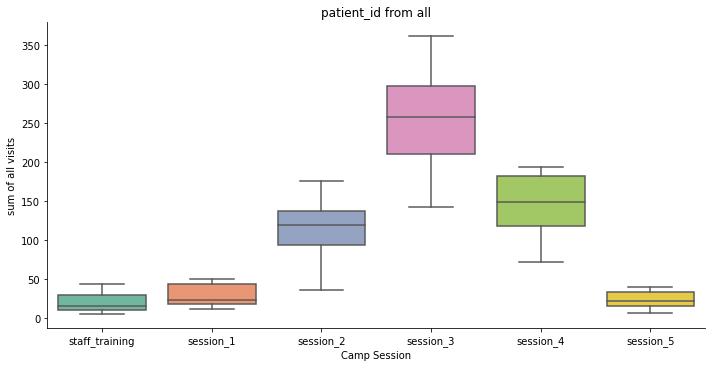

               patient_id                                                    
                    count    mean    std    min     25%    50%     75%    max
session_id                                                                   
session_1             6.0   28.83  16.61   12.0   17.25   23.0   43.00   50.0
session_2             6.0  113.00  48.29   36.0   93.00  119.0  137.50  176.0
session_3             6.0  253.67  77.88  142.0  210.50  257.0  296.75  361.0
session_4             6.0  144.17  47.53   72.0  118.00  149.0  182.25  194.0
session_5             6.0   23.00  13.02    6.0   14.75   21.5   32.75   40.0
staff_training        3.0   21.00  19.70    5.0   10.00   15.0   29.00   43.0


In [22]:
session_plot('all', 'patient_id', 'sum')

### Longer Sessions Have More Visits
One observation is immediately clear: Session 3 has the most visits, followed by a kind of tie between Session 2 and 4. This makes sense because of our camp's summer schedule. __Session 3 is the longest session__, at three weeks, while Sessions 2 and 4 are two-week sessions. Session 1 and 5 are one-week sessions. It makes sense that the shorter sessions have fewer visits to the health center.

Why do most sessions appear to have a have a very low minimum value? Shouldn't there be at least a few dozen in each session every year? This is a problem with the dataset. One year, 2016, vastly underreported visits. More on this inconsistency here: https://github.com/amcgaha/coding-health-records#data-source. For this study, we should be skeptical of minimum values and specific data points in general, focusing more on the general distribution.

Also visible is a difference between Session 2 and 4. Both the spread of values and the mean shows a large difference, with Session 2 showing 98 visits on average while Session 4 shows 142 on average. The reason for this difference is unclear. One possibility is a real increase in ailments over time, as conditions evolve throughout the summer. This will need to be explored in finer detail.

Staff training has the lowest visit numbers of all, and that also makes sense. There are only about 65 staff present during this time -- and zero campers. It is also common for no medical staff to be present for the first few days of training, resulting in very few visits recorded.

Let's plot the data for staff in particular. What can we see?

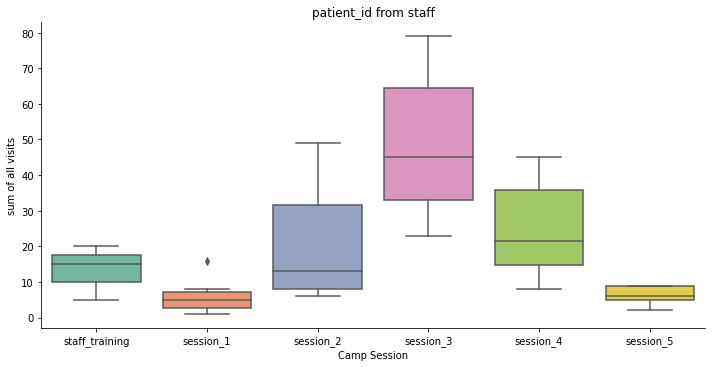

               patient_id                                              
                    count   mean    std   min    25%   50%    75%   max
session_id                                                             
session_1             6.0   6.17   5.42   1.0   2.75   5.0   7.25  16.0
session_2             6.0  20.83  17.78   6.0   8.00  13.0  31.50  49.0
session_3             6.0  48.67  21.92  23.0  33.00  45.0  64.50  79.0
session_4             6.0  24.83  14.63   8.0  14.75  21.5  35.75  45.0
session_5             5.0   6.20   2.95   2.0   5.00   6.0   9.00   9.0
staff_training        3.0  13.33   7.64   5.0  10.00  15.0  17.50  20.0


In [23]:
session_plot('staff', 'patient_id', 'sum')

### For Staff, Training is not the Lowest

When we look at staff, we can see a similar pattern to the rest of the data. The main difference is that staff training jumps three ranks, above both one week sessions, in terms of average number of visits. This pattern is interesting. Why do staff visit the health center more during training -- when medical staff may not even be present, resulting in underreporting -- than both one week sessions combined?

We will need to dig into specific categories to search for explanations. Before we move on, however, let's take a look at the entire dataset on a finer resolution. Let's call ```day_plot_double()``` to show camper and staff total visits by day of the summer. 

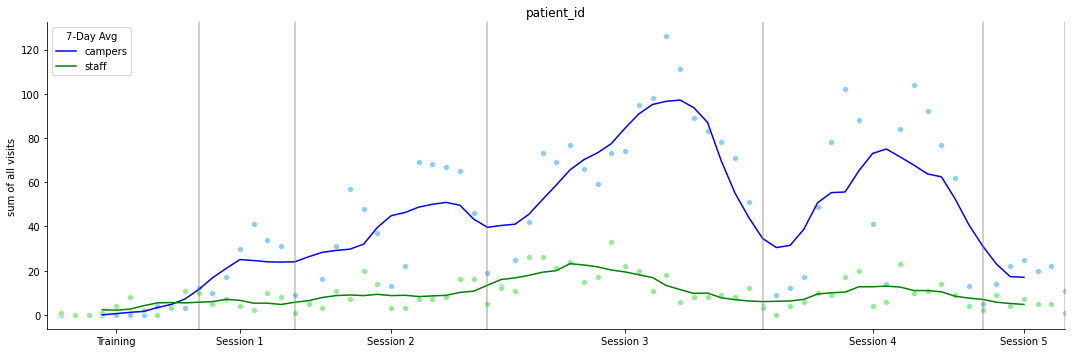

       campers  staff   diff
count    74.00  74.00   0.00
mean     41.85   9.35  32.50
std      34.20   7.28  26.92
min       0.00   0.00   0.00
25%      12.25   4.00   8.25
50%      32.50   8.00  24.50
75%      70.50  12.00  58.50
max     126.00  33.00  93.00


In [24]:
day_plot_double('patient_id', 'sum')

### Four Waves of Camper Visits
Staff visits begin steady, with about 5-10 visits recorded on each camp day across all years in the past. They rise through Session 2 and partway through 3, ending in a peak of 33 visits recorded. Visits decline for the most part after that, except for a modest increase in the middle of Session 4. 

The overall impression -- at least at this scale -- is of a steady stream of staff visits throughout the summer, trending upward for the first half and downward for the second.

Camper visits, on the other hand, show four distinct phases, or "waves", corresponding to the middle of each session. 

For context, it's important to note that during Sessions 2, 3, and 4, all campers go on a two-night backpacking trip. The trips fall in the middle of the session. As the data shows, these trips tend to align with higher visits to the health center -- both before and after. These sessions are also longer, giving campers more time to develop all kinds of ailments like bug bites, injuries, or communicable diseases. We will explore these categories specifically in future explorations.

### What are the top visit categories?

Let's list the top categories for campers and staff. First, lets define two functions: one to rank the most common health center visits, and another to add highlighting for emphasis.

In [25]:
def top_visits(dataframe_str):
    """Ranks categories currently in bool columns and transforms into dataframe """
    
    rank_columns = ['abdominal_pain', 'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'one_cold_flu', 'two_cold_flu', 'gi_issues', 'injury',
       'allergic', 'entropy', 'mental_health', 'random', 'bugs_any']
    
    selected_df = df_dict[dataframe_str]
    
    top_ranked = pd.DataFrame(selected_df[rank_columns].sum().sort_values(ascending=False))
    
    top_ranked_reset = top_ranked.reset_index().rename({'index': dataframe_str}, axis=1)
    
    return top_ranked_reset


def highlight(s):
    """ Highlights cold and flu symptoms in table form for emphasis. """
    
    is_match = s == 'one_cold_flu'
    return ['background-color: yellow' if v else '' for v in is_match]


This study is most interested in cold and flu symptoms. Lets print the top visits and highlight where the bucket ```'one_cold_flu'``` stands in the ranks.

In [26]:
# run function on each dataframe
top_all = top_visits('all')
top_campers = top_visits('campers')
top_staff = top_visits('staff')

# store results in dictionary
top_dict = {'all': top_all,
            'campers': top_campers,
            'staff': top_staff}

# combine dataframes into one
top_combined = pd.concat(top_dict, axis=1)

# configure results for printing
output_df = top_combined[['all', 'campers', 'staff']].head(10)

# add highlighting
highlighted = output_df.style.apply(highlight)

# display html
display(highlighted)

# export results for future visualization
top_combined.to_csv('C:\\Users\\avery\\OneDrive\\wave_visuals\\top_health_visits.csv')

### Cold & Flu Symptoms Among Top 3
The top 3 ailments presented to the health center are injuries, bug bites, and cold/flu symptoms, captured in the list above as ```'one_cold_flu'```. (More on this category below). For staff, however, cold and flu symptoms are #1. Even individual symptoms like congestion and sore throat make it to the top 10 for staff.

This observation confirms the importance of studying cold and flu symptoms presented to the health center. 

### Focus on Cold & Flu
The main questions motivating this study are: 

1. What has the distribition of cold and flu symptoms been like since 2013? 
2. Has the distribition differed between staff and campers?

To begin to tackle these questions, we need to change the ```agg_func``` we're using from ```'sum'``` to ```'percent'```. This will show how each category changes relative to the overall number of visits. Using the percent of visits, whether by session or by each day, controls for the fact that overall visits tend to rise in certain times across the board.

Now, let's plot cold and flu symptoms. There are many ways to capture cold and flu symptoms, including targeting specific symptoms, like congestion, that might be representative. Another approach could be to cast a wide net and include any symptoms. This study takes the inclusive approach. 

We use the column ```'one_cold_flu'```, which becomes True in the column if a visit shows at least one cold or flu symptom. In the plot, we will see the aggregate of Trues for this category. The benefit of using this category is that it is broad and inclusive. It captures a wide range of respiratory ailments, and we hope, real illneses. The drawback is that the data also includes ambiguous symptoms, like fatigue. The data will therefore likely include some false positives. We can think of this category as __Possible Infections__, because we know it captures all real infections and probably some false ones too. 

Because we're trying to capture trends where people are "feeling sick" from possible respiratory infections, and not actually trying to diagnose people, we are okay with erring on the side of being too inclusive. We think this will most help us with our goal, which is to both develop and measure future preventative actions. 

To check our conclusions, we can also apply a more restrictive category, ```'two_cold_flu'``` or __Likely Infections__, which includes visits that have at least two cold or flu symptoms.

The symptoms included are:

* Cough
* Shortness of breath or chest discomfort
* Fever or chills
* Sore throat
* Congestion
* Fatigue, feeling tired, body aches

To learn more visit: https://github.com/amcgaha/coding-health-records/blob/main/README.md#cold--flu-symptom-subset

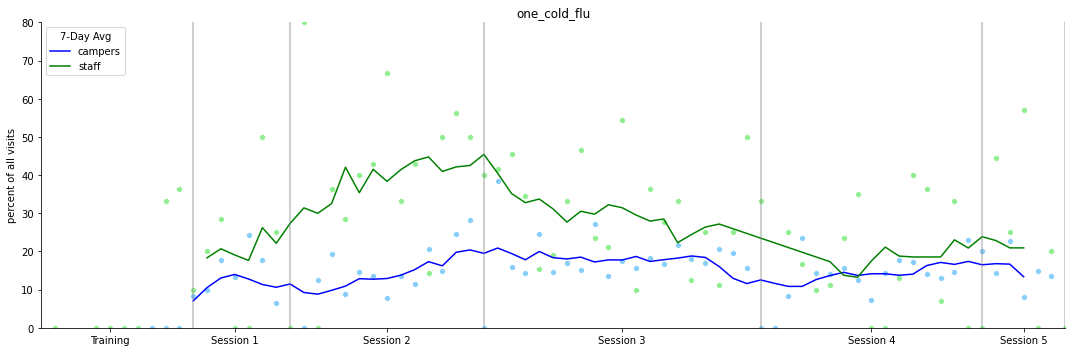

       campers  staff   diff
count    67.00  70.00  -3.00
mean     14.22  25.46 -11.24
std       7.78  19.25 -11.47
min       0.00   0.00   0.00
25%      10.80  10.00   0.80
50%      14.52  25.00 -10.48
75%      17.92  39.09 -21.17
max      38.46  80.00 -41.54


In [27]:
day_plot_double('one_cold_flu', 'percent')

### Staff Show Higher Rate of Likely Infections

Right away, we can see that staff likely infections are almost always a higher percent of visits than for campers. 

On average, more than 25 percent of health center visits from staff respresent possible infections. Campers tend to show a smaller percent, about 14 on average. 

(This difference is only observed when looking at the percent of visits by staff or campers. In raw counts, campers always have more visits because there are 50 percent more campers than staff.)

Staff percent of visits also had more than double the variation across summer days. The standard deviation is about 20 percent for staff, and only about 8 percent for campers. 

The distribution across summer days also has some interesting features. For staff, there are two distinct peaks in the percent of visits that show possible infections. The first and most dramatic movement happens in the first few weeks of summer, where staff possible infections follow a steep linear trajectory toward the first peak. The peak happens at the end of Session 2, where the 7-Day Average reaches about 50 percent. 

A long, slow decline follows, ending in the summer low average of about 10 percent just before the halfway mark of Session 4. After that point, likely infections seem to rise again, although with large variation day-to-day, which creates a modest-but-elevated average of about 20 percent.

On the other hand, campers seem to have a fairly constant percent of cold and flu visits, with perhaps a small peak that coincides with the peak for staff.

The above plot focuses on each day by finding the percent of all visits ever recorded that day that showed cold and flu symptoms. This method is great for describing trends across the summer by day, but it can miss variation between years. To see these differences, let's call ```session_plot``` on staff visits. 

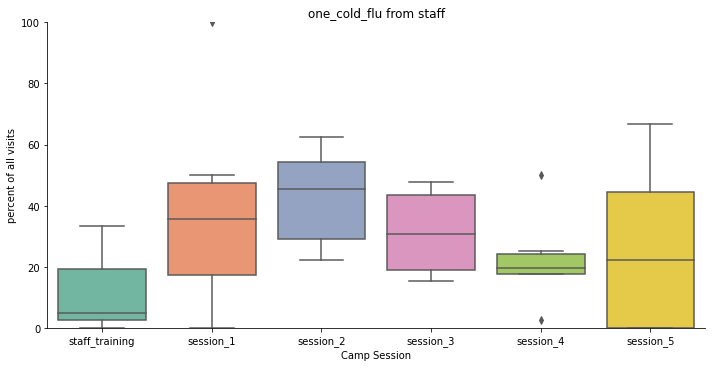

               one_cold_flu                                                  
                      count   mean    std    min    25%    50%    75%     max
session_id                                                                   
session_1               6.0  38.96  35.00   0.00  17.19  35.62  47.50  100.00
session_2               6.0  42.68  16.41  22.22  28.95  45.41  54.17   62.50
session_3               6.0  31.21  14.26  15.38  18.93  30.75  43.36   47.83
session_4               6.0  22.40  15.54   2.56  17.68  19.60  24.11   50.00
session_5               5.0  26.67  28.97   0.00   0.00  22.22  44.44   66.67
staff_training          3.0  12.78  17.98   0.00   2.50   5.00  19.17   33.33


In [28]:
session_plot('staff', 'one_cold_flu', 'percent')

### Staff Infections Appear to Rise in the First Half
The plot above suggests that staff possible infections become an increasingly high percent of total visits from Staff Training to Session 1 and then to Session 2. It then suggests that the proportion falls for Session 3 and 4, before extreme variation in Session 5.

How well does this desciption actually match what has happened in the past? Is there really a trend of rising infections for staff, followed by a slow recovery? 

Let's look at the data session by session.

## Staff Training:  

### Can the data be trusted?

Staff Training numbers should be taken less seriously than others, since we can see that only 3 years (count = 3) have reported any symptoms during this period. This is likley because medical staff are often not present during training to take records. 

To see if that guess matches the data, we need to look closer at the data year by year. Let's define a function to do that efficiently moving forward, and then see what we get for Staff Training.


In [55]:
def group_by_year(dataframe_str, session_str, category_str):
    
    """Group a dataframe subset by year, based on a chosen session and category"""
    
    # select dataframe
    n_df = df_dict[dataframe_str]
    
    # subset based on session choice and category
    n_subset_df = n_df.loc[n_df['session_id'] == session_str, ['report_year', 'patient_id', category_str]]
    
    # apply groupby and functions, make into dataframe
    grouped = pd.DataFrame(n_subset_df.groupby(['report_year']).agg({'patient_id': 'count',
                                                                     category_str: 'sum'}))
    # add percent column
    grouped['percent'] = round((grouped[category_str] / (grouped['patient_id']) * 100), 2)
    
    return grouped

In [53]:
group_by_year('staff', 'staff_training', 'one_cold_flu')

,patient_id,one_cold_flu,percent
report_year,,,
2013,5,0.0,0.00
2015,20,1.0,5.00
2017,15,5.0,33.33


### We lack data. How many infections go unnoticed?

Our guess was correct. It looks like there were only three years in which medical staff were present during staff training, producing relatively few records. 

With such sparse data, what can be said about possible infections during Staff Training? 

While we can't make declarations about the trends, we can say this: One summer, when we had medical staff present, 33 percent of staff visits to the health hut showed cold and flu symptoms. This might have allowed us to catch communicable diseases early and apply interventions like mask-wearing and social distancing. 

### Hiring medical staff can help
In the future, it would be smart to hire medical staff for the training period. This would not only produce more reliable data. It would also allow us to possibly prevent further infections, promoting the health and wellbeing of our campers and staff.

> This is a key takeaway from the study. We will highlight it in our report for decision-makers.

## Session 1: Vigilance Required

### There's more data, but it's still sparse

In the session plot, staff possible infections appear to rise from training to Session 1. According to the average, about 39 percent of all staff visits to the health center this session report cold and flu symptoms. 

Variation is pronounced in Session 1 and Session 5, both one-week sessions. One year reported 0 percent staff possible infections during Session 1. Another year -- the outlier visible at the top of the plot -- reported 100 percent of visits showing possible infections.

The extreme range and wide variation are curious. Before we can take the average of 39 percent seriously, we should see what the data looks like year to year.

In [51]:
group_by_year('staff', 'session_1', 'one_cold_flu')

,patient_id,one_cold_flu,percent
report_year,,,
2013,2,1.0,50.00
2014,1,1.0,100.00
2015,5,0.0,0.00
2017,5,2.0,40.00
2018,16,5.0,31.25
2019,8,1.0,12.50


The good news is that almost every year (except 2016, which has widespread underreporting problem) records some visits to the health center during Session 1. While the first two years seem to possibly underreport, the following years all have at least a handful of visits. 

Notably, 2018 has a lot of visits! This could be because many people were sick (31 percent of those visits were cold or flu related) or because the medical staff were very thorough in reporting. 


### Possible Infections? There's at least one, almost always.
Because there isn't much data from this session, we can't say very much about any overarching trends. We can't say, for example, that possible infections tend to rise after Staff Training into Session 1. There's just not enough data. 

What we can say, however, is that cold and flu symptoms present in health center records almost every year during Session 1. That means that every year, at least one staff member is possibly sick with a respiratory infection during Session 1. 

We can also say that we don't have evidence that respiratory infections are consistently widespread among staff. In 2018, there might have been many staff infected with something, but we can't be sure. Otherwise, the number of visits that show symptoms is just one or two.

> What should we recommend to decision-makers? 
Even if we aren't looking for infections during the first session, __one staff member is probably sick!__ During this time, we have the opportunity to use monitoring and interventions to control the spread of infectious diseases. 

### What about campers? 
This is the first session with campers. While it's possible that at least one staff member may already be sick, it's worth looking at campers for this session as well. 

In [56]:
group_by_year('campers', 'session_1', 'one_cold_flu')

,patient_id,one_cold_flu,percent
report_year,,,
2013,19,1.0,5.26
2014,11,3.0,27.27
2015,20,2.0,10.00
2016,36,2.0,5.56
2017,11,1.0,9.09
2018,34,7.0,20.59
2019,41,10.0,24.39


### A few campers may be sick, too.
Luckily, there is more data when we look at camper visits. This overview shows that there are almost always a couple visits from campers that show cold or flu symptoms. 

Two years stand out. First, 2018 had 7 visits, or about 20 percent, that showed cold or flu symptoms. This is the same year where 31 percent of staff visits showed cold or flu symptoms. This could be a coincidence. It could also mean that there were more infections than usual happening this year, and that it impacted both campers and staff. 

Another interesting year is 2019, in which 10 visits, or about 24 percent, showed cold or flu symptoms. Only one staff visit presented as a possible infection that year. It could be that the source of the infection was a camper this year, or that staff did not report their symptoms. 

> Looking at camper infections emphasizes the __need for monitoring and early interventions__.


<br>

## Session 2: Make Or Break
According to the day plot, staff and camper possible respiratory infections rise over the course of Session 2. To remind us what that looks like, let's reproduce the plot below.

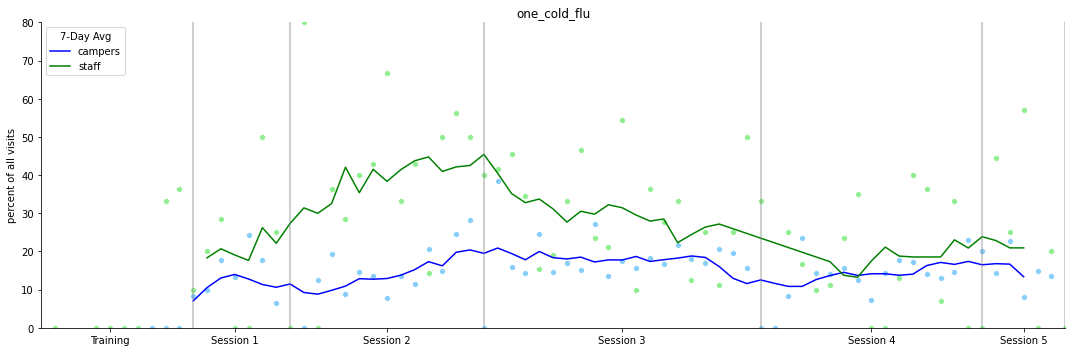

       campers  staff   diff
count    67.00  70.00  -3.00
mean     14.22  25.46 -11.24
std       7.78  19.25 -11.47
min       0.00   0.00   0.00
25%      10.80  10.00   0.80
50%      14.52  25.00 -10.48
75%      17.92  39.09 -21.17
max      38.46  80.00 -41.54


In [57]:
day_plot_double('one_cold_flu', 'percent')

We have established that we can't rely on the sparse data in Staff Training. While Session 1 also isn't very conclusive, it tends to show at least one staff visit per year that is a possible infection. As the plot above implies, much more data comes in for Session 2. Let's break it down by year.

In [58]:
group_by_year('staff', 'session_2', 'one_cold_flu')

,patient_id,one_cold_flu,percent
report_year,,,
2013,36,20.0,55.56
2014,18,4.0,22.22
2015,8,5.0,62.50
2017,49,20.0,40.82
2018,8,2.0,25.00
2019,6,3.0,50.00


### Finally, enough data!

While variation is clear, there are finally enough records for to justify talking about the average visits and average percent of visits, as well as other statistical descriptions. 

Session 2 seems to be the peak of infections for staff, and so it's important to study it in detail. Let's also reproduce the session plot to easily reference the statistical descriptions.

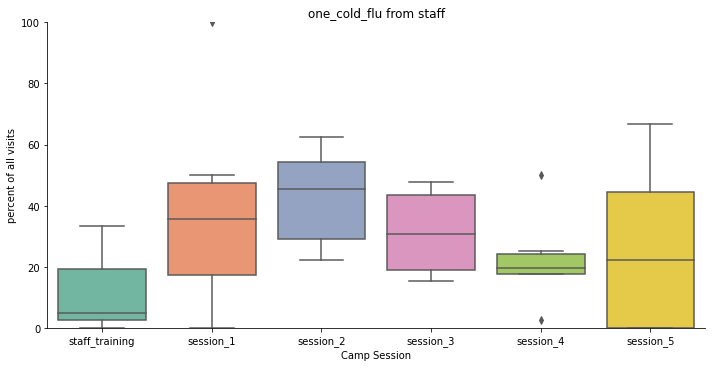

               one_cold_flu                                                  
                      count   mean    std    min    25%    50%    75%     max
session_id                                                                   
session_1               6.0  38.96  35.00   0.00  17.19  35.62  47.50  100.00
session_2               6.0  42.68  16.41  22.22  28.95  45.41  54.17   62.50
session_3               6.0  31.21  14.26  15.38  18.93  30.75  43.36   47.83
session_4               6.0  22.40  15.54   2.56  17.68  19.60  24.11   50.00
session_5               5.0  26.67  28.97   0.00   0.00  22.22  44.44   66.67
staff_training          3.0  12.78  17.98   0.00   2.50   5.00  19.17   33.33


In [60]:
session_plot('staff', 'one_cold_flu', 'percent')

### On average, *nearly half* of staff visits in Session 2 show cold or flu symptoms. 

For all the visits to the health center during Session 2, about half of those have shown cold or flu symptoms. The average is about 42 percent, and the median is 45 percent. 

The highest year was 2015, in which 5 out of the 8 visits showed symptoms, creating the maximum rate of 62 percent. The lowest year ever was 2014, in which about 4 out of the 18 total visits showed symptoms. That's about 22 percent. 

Most years reported few visits total, between 6 and 18. Those had just a handful of cold or flu symptoms, between 2 and 6. Other years, by contrast, had dozens of visits. Both years with high visits showed 20 visits with cold and flu symptoms. 

How should we interpret these facts?

Cold and flu symptoms have always been present in Session 2, although the levels vary year-to-year. In the lowest year, one in five visits showed possible infections. In the highest year, nearly two out of every three visits showed possible infections. 

>__If there is an early outbreak, it will probably become clear in Session 2__ as more patients, __particularly staff__, present to the health center. More than just a few staff visits will be cause for concern, because the trajectory could reach as many as 20 visits, possibly more. That could imply a heavy burden of disease for staff. Stronger interventions may be required at this point, such as isolating groups of patients for sleeping and meals.

### Session 2 always shows symptoms for staff. What about campers?
Let's see the session plot for campers.

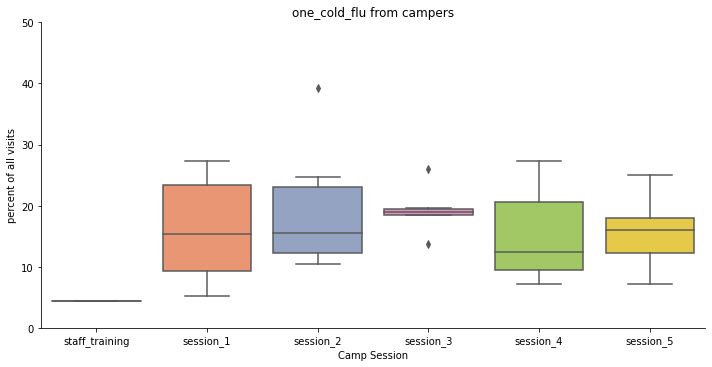

               one_cold_flu                                                 
                      count   mean    std    min    25%    50%    75%    max
session_id                                                                  
session_1               6.0  16.10   9.14   5.26   9.32  15.29  23.44  27.27
session_2               6.0  19.58  10.96  10.43  12.31  15.47  23.03  39.29
session_3               6.0  19.24   3.93  13.71  18.45  18.90  19.48  25.97
session_4               6.0  15.19   8.12   7.19   9.43  12.39  20.61  27.37
session_5               6.0  15.63   6.15   7.14  12.23  15.97  18.05  25.00
staff_training          1.0   4.35    NaN   4.35   4.35   4.35   4.35   4.35


In [63]:
session_plot('campers', 'one_cold_flu', 'percent')

### Campers show highest level of symptoms in Session 2, but also the most variation.

Across all sessions, campers tend to present cold or flu symptoms in 15 to 20 percent of visits on average. Session 2 sits at the top of that range, with the highest average of all years at 19.58 percent. It also has the highest variation among sessions, with a standard deviation of nearly 11 percent. 

This means that while Session 2 tends to have the highest proportion of visits with cold symptoms, there is also a high degree of variation year-to-year. It could mean that there are some years with no symptoms and some years with many.

Let's look at the year breakdown.

In [61]:
group_by_year('campers', 'session_2', 'one_cold_flu')

,patient_id,one_cold_flu,percent
report_year,,,
2013,140,18.0,12.86
2014,99,12.0,12.12
2015,28,11.0,39.29
2016,11,1.0,9.09
2017,94,17.0,18.09
2018,77,19.0,24.68
2019,115,12.0,10.43


### Campers are sick at lower rates than staff. But some are always sick.

Above, we saw there is modest variation among the *percent* of possible infections. However, the table above reveals that the count of visits showing cold and flu symptoms is more consistent. 

In other words, campers __always show cold and flu symptoms__ during Session 2. On average, campers show 14 visits on average with cold and flu symptoms. Of all their visits in Session 2, an average of 20 percent show symptoms.

(Recall that sometimes we must ignore the bad data year of 2016, especially when looking at counts.)

There may be a reason that the percentage varies while the count remains more consistent. It may be that the percentage varies because other types of visits (like bug bites or injuries) have been highly variable, which would influence the percent of visits from cold and flu symptoms.

To see the consistency in the count of camper visits more clearly, let's change the `'percent'` to `'sum'` in the session plot function.

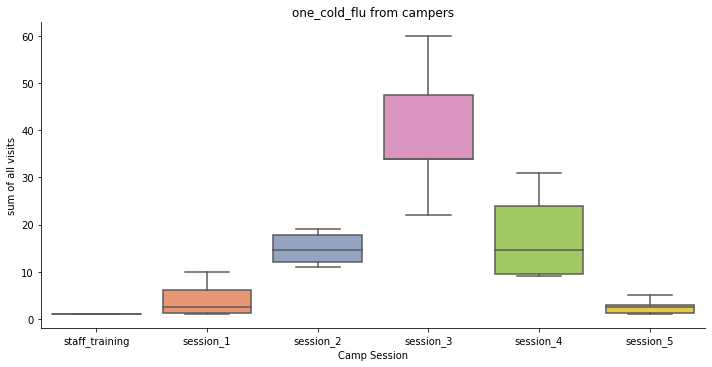

               one_cold_flu                                              
                      count   mean    std   min    25%   50%    75%   max
session_id                                                               
session_1               6.0   4.00   3.69   1.0   1.25   2.5   6.00  10.0
session_2               6.0  14.83   3.54  11.0  12.00  14.5  17.75  19.0
session_3               6.0  39.33  13.95  22.0  34.00  34.0  47.50  60.0
session_4               6.0  17.33   9.40   9.0   9.50  14.5  24.00  31.0
session_5               6.0   2.50   1.52   1.0   1.25   2.5   3.00   5.0
staff_training          1.0   1.00    NaN   1.0   1.00   1.0   1.00   1.0


In [80]:
session_plot('campers', 'one_cold_flu', 'sum')

### Every year, *at least 11* camper visits show possible infections.
Aside from a bad data year, the minimum number of camper visits showing cold and flu symptoms was 11. 

That means in the "healthiest" Session 2 ever (2015, which curiously also has the highest percent of visits, at 39 percent) there were still campers who visited the health hut showing symptoms of a communicable disease. Medical staff recorded 11 camper visits across the session. That's one visit for every day campers were on the main camp property ("base camp") and not out their backpacking trip, when medical staff rarely make reports.

But the minimum is history's best case scenario. The maximum number of camper visits recorded showing symptoms was 19, nearly two visits for every day campers are in base camp.

> The takeaway for decision-makers is that respiratory infections seem to always be present in Session 2, and that the number of visits is fairly consistent year-to-year. It's important to take preventative measures, monitor, intervene when necessary. The lesson from Session 2 is that infections are probably present even if we're not looking for them. 

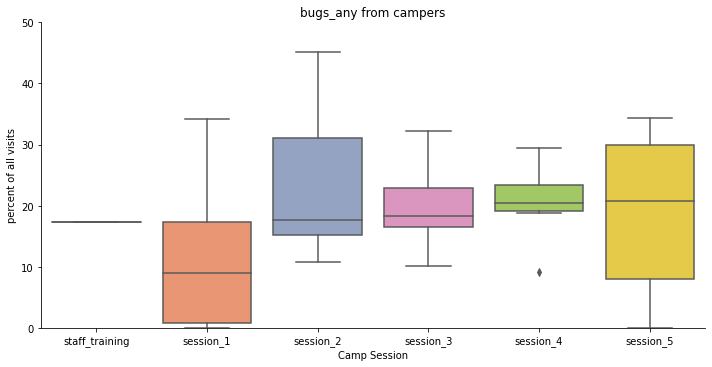

               bugs_any                                                 
                  count   mean    std    min    25%    50%    75%    max
session_id                                                              
session_1           6.0  11.71  13.47   0.00   0.74   8.97  17.39  34.15
session_2           6.0  23.52  13.54  10.71  15.24  17.57  31.10  45.22
session_3           6.0  19.84   7.55  10.08  16.50  18.28  22.81  32.18
session_4           6.0  20.39   6.71   9.15  19.06  20.42  23.37  29.41
session_5           6.0  18.75  14.11   0.00   7.98  20.78  29.90  34.29
staff_training      1.0  17.39    NaN  17.39  17.39  17.39  17.39  17.39


In [82]:
session_plot('campers', 'bugs_any', 'percent')

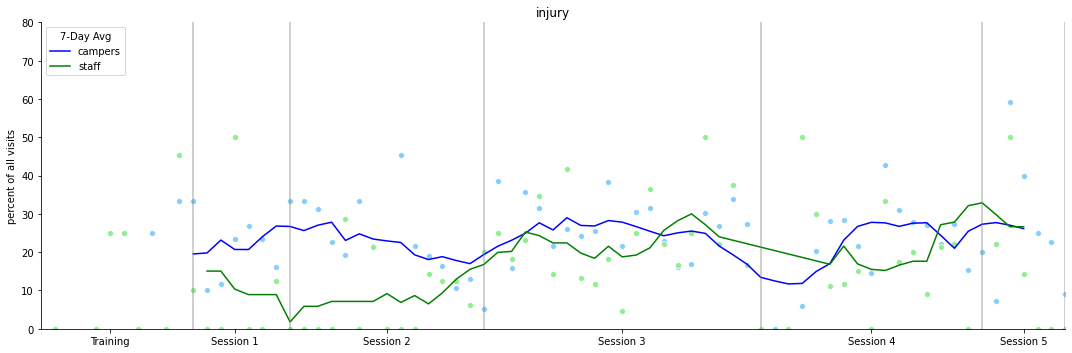

       campers   staff   diff
count    67.00   70.00  -3.00
mean     23.01   16.68   6.33
std      11.68   17.89  -6.21
min       0.00    0.00   0.00
25%      16.17    0.00  16.17
50%      23.33   14.29   9.04
75%      30.74   24.52   6.22
max      59.09  100.00 -40.91


In [84]:
day_plot_double('injury', 'percent')